In [1]:
%pylab inline
import pandas as pd
import seaborn as sns 

from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
df_movies = pd.read_pickle(r'C:\Users\DELL\Desktop\Data\movies-clean.pkl')
df_ratings = pd.read_pickle(r'C:\Users\DELL\Desktop\Data\ratings-clean.pkl')

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34208 entries, 0 to 34207
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  34208 non-null  int64 
 1   title    34208 non-null  object
 2   genres   34208 non-null  object
 3   year     34208 non-null  int16 
dtypes: int16(1), int64(1), object(2)
memory usage: 868.7+ KB


In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   movieId    int64         
 1   rating     float16       
 2   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float16(1), int64(1)
memory usage: 392.8 MB


In [5]:
df_movies.head()

,movieId,title,genres,year
0,1,Toy Story,"(animation, comedy, children, fantasy, adventure)",1995
1,2,Jumanji,"(adventure, children, fantasy)",1995
2,3,Grumpier Old Men,"(comedy, romance)",1995
3,4,Waiting to Exhale,"(comedy, drama, romance)",1995
4,5,Father of the Bride Part II,(comedy),1995


In [6]:
df_movies[df_movies[df_movies['year'] > 0]['year'].min() == df_movies['year']]

,movieId,title,genres,year
33313,148054,Passage de Venus,(documentary),1874


In [7]:
df_movies[df_movies['year'].max() == df_movies['year']]

,movieId,title,genres,year
26472,122894,Avatar 2,"(action, adventure, fantasy)",2016
30459,138210,13 Hours,(drama),2016
30926,139857,Colonia,(thriller),2016
33343,148172,The 5th Wave,"(sci-fi, adventure, thriller)",2016
33654,149406,Kung Fu Panda 3,"(action, adventure, animation)",2016
33895,150194,Quo vado?,(comedy),2016
33920,150294,The Forest,"(thriller, horror)",2016
33973,150548,Sherlock: The Abominable Bride,"(action, mystery, thriller, crime, drama)",2016
33996,150602,Band of Robbers,"(comedy, adventure, thriller, crime)",2016
34026,150724,Army Dog,((no genres listed)),2016


In [8]:
df_movies['movieId'].duplicated().sum()

0

In [9]:
count_movies_by_year = df_movies[['movieId','year']].groupby('year').count().loc[0:]
count_movies_by_year

,movieId
year,
1874,1
1878,1
1887,1
1888,2
1890,3
...,...
2012,1387
2013,1476
2014,1420


<AxesSubplot:xlabel='year'>

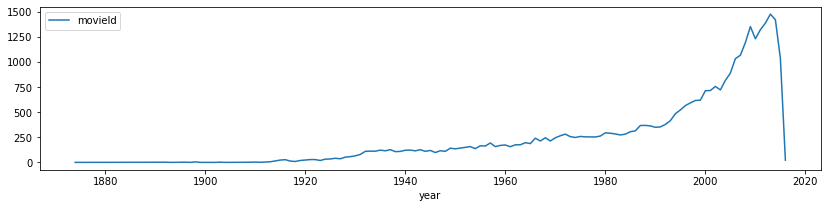

In [10]:
count_movies_by_year.plot(figsize = (14,3))

In [11]:
df_movies['genres'] = df_movies['genres'].apply(lambda x: list(x))
df_1 = df_movies.explode('genres')
df_1

,movieId,title,genres,year
0,1,Toy Story,animation,1995
0,1,Toy Story,comedy,1995
0,1,Toy Story,children,1995
0,1,Toy Story,fantasy,1995
0,1,Toy Story,adventure,1995
...,...,...,...,...
34204,151701,Bloodmoney,(no genres listed),2010
34205,151703,The Butterfly Circus,drama,2009
34206,151709,Zero,sci-fi,2015
34206,151709,Zero,drama,2015


<AxesSubplot:>

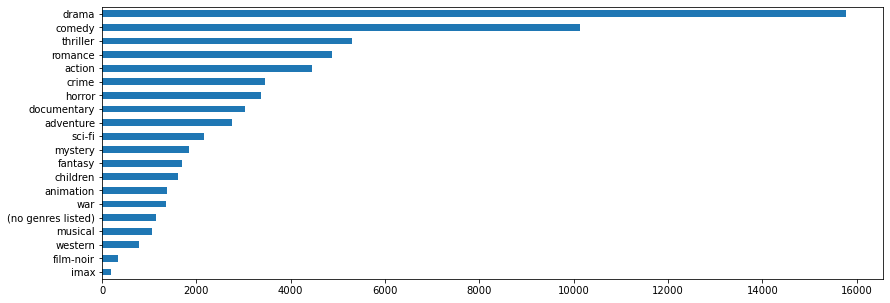

In [12]:
df_1['genres'].value_counts().sort_values(ascending = True).plot(kind='barh', figsize=(14,5))

<AxesSubplot:>

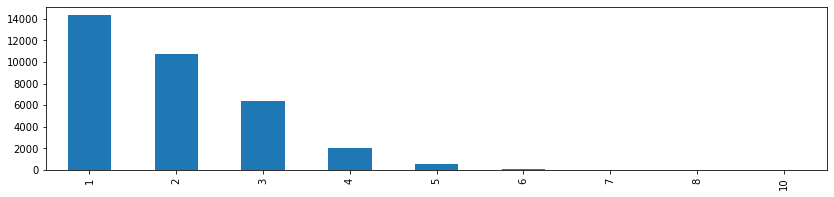

In [13]:
df_movies['genres'].apply(len).value_counts().plot(kind='bar', figsize=(14,3))

In [14]:
df2 = df_1[df_1['year']>1940]
df2

,movieId,title,genres,year
0,1,Toy Story,animation,1995
0,1,Toy Story,comedy,1995
0,1,Toy Story,children,1995
0,1,Toy Story,fantasy,1995
0,1,Toy Story,adventure,1995
...,...,...,...,...
34204,151701,Bloodmoney,(no genres listed),2010
34205,151703,The Butterfly Circus,drama,2009
34206,151709,Zero,sci-fi,2015
34206,151709,Zero,drama,2015


In [15]:
df2['times'] = pd.cut(df2['year'], bins=range(1940,2030,10), labels=[f"{x}s" for x in range(40,100,10)]+['2000s','2010s'])
df2

C:\Users\DELL\AppData\Local\Temp/ipykernel_16468/3627735210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['times'] = pd.cut(df2['year'], bins=range(1940,2030,10), labels=[f"{x}s" for x in range(40,100,10)]+['2000s','2010s'])


,movieId,title,genres,year,times
0,1,Toy Story,animation,1995,90s
0,1,Toy Story,comedy,1995,90s
0,1,Toy Story,children,1995,90s
0,1,Toy Story,fantasy,1995,90s
0,1,Toy Story,adventure,1995,90s
...,...,...,...,...,...
34204,151701,Bloodmoney,(no genres listed),2010,2000s
34205,151703,The Butterfly Circus,drama,2009,2000s
34206,151709,Zero,sci-fi,2015,2010s
34206,151709,Zero,drama,2015,2010s


In [16]:
df3 = df2[['movieId', 'genres','times']]\
    .groupby(by=['genres','times'])\
    .count()\
    .rename(columns ={'movieId': 'production_count'})\
    .fillna(0)\
    .astype(int)\
    .unstack()
df3

production_count                                         
times                           40s  50s   60s   70s   80s   90s 2000s 2010s
genres                                                                      
(no genres listed)               27   45    68   128   106   168   206   293
action                           76  100   231   446   531   754  1360   857
adventure                        84  166   215   215   332   398   743   458
animation                        27   19    45    66   144   221   497   329
children                         37   36    78   111   172   344   500   298
comedy                          307  339   582   667  1097  1806  2975  1757
crime                           176  189   195   348   290   531  1011   520
documentary                      27   22    75   126   120   328  1250  1040
drama                           650  862  1008  1141  1297  2498  4699  2695
fantasy                          47   47    95   105   215   269   555   288
film-noir                       168   86     6     6    17    14    18     7
horror                           52  117   188   371   448   388  1040   673
imax                              0    0     0     0     2    21    70   103
musical                         111  115    89    93    93   108   236    79
mystery                         132   62   102   191   128   223   584   291
romance                         301  296   231   208   378   834  1448   670
sci-fi                           14  128   145   177   312   340   560   430
thriller                        154  145   197   416   436   849  1847  1158
war                             133  156   163   102   120   125   321   130
western                          79  160   151   112    35    54    66    38

<AxesSubplot:xlabel='None-times', ylabel='genres'>

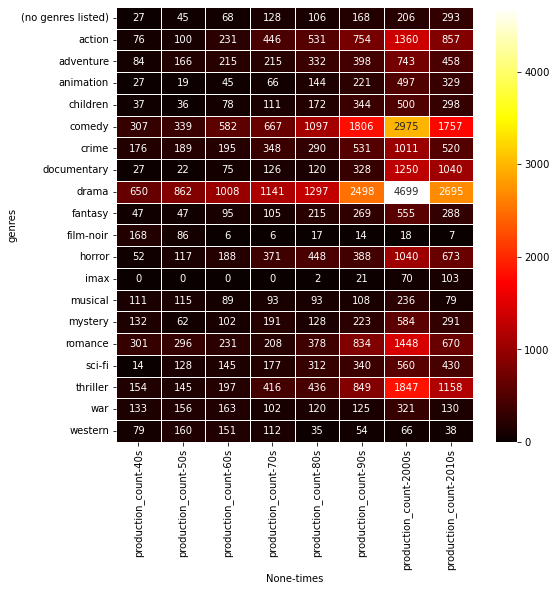

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df3, cmap='hot', annot =True, fmt ='1', ax=ax, linewidth=0.5)

In [18]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22884377 entries, 0 to 22884376
Data columns (total 3 columns):
 #   Column     Dtype         
---  ------     -----         
 0   movieId    int64         
 1   rating     float16       
 2   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float16(1), int64(1)
memory usage: 392.8 MB


<AxesSubplot:ylabel='Frequency'>

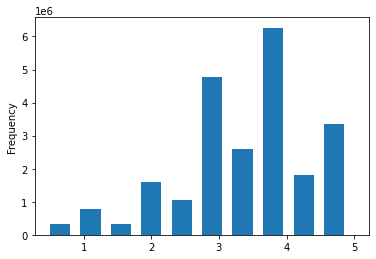

In [19]:
df_ratings['rating'].plot(kind='hist', bins =10, width =0.3)

<AxesSubplot:>

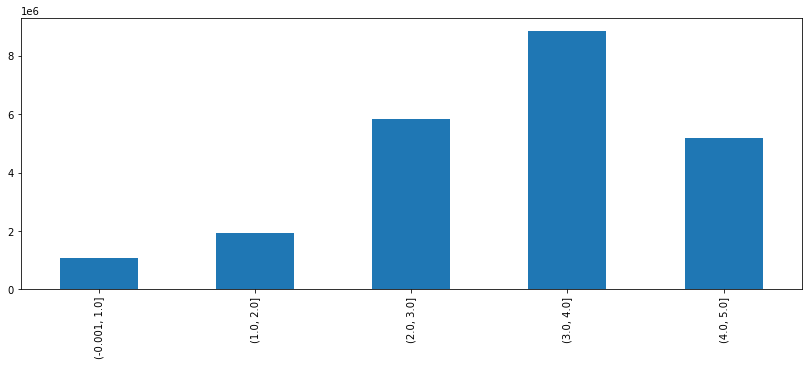

In [20]:
df_ratings['rating'].value_counts(bins = np.linspace(0,5, num=6)).sort_index().plot(kind= 'bar', figsize = (14,5))

In [21]:
dfq = df_ratings[['movieId', 'rating']] \
    .groupby("movieId") \
    .agg({'rating': ['mean','std','count']})
dfq = dfq[dfq['rating']['count']>100]
dfq

rating                 
             mean       std  count
movieId                           
1        3.894531  0.917573  60424
2        3.220703  0.956524  23950
3        3.179688  1.011466  15267
4        2.878906  1.105317   2935
5        3.080078  0.987952  14769
...           ...       ...    ...
143385   3.787109  0.730492    398
146656   3.794922  0.770152    156
148238   2.457031  1.116179    107
148626   3.937500  0.825619    276
150548   3.744141  0.879143    151

[9062 rows x 3 columns]

In [22]:
dfq = pd.concat([dfq['rating']['mean'], dfq['rating']['std']], axis = 1).reset_index()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

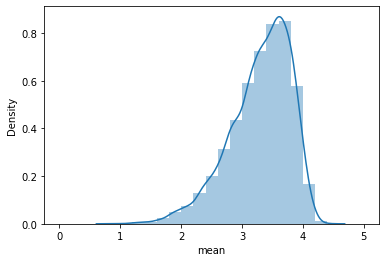

In [23]:
sns.distplot(dfq['mean'], bins = np.linspace(0,5, num=26))

In [24]:
bad_movies = dfq[dfq['mean']<dfq['mean'].quantile(0.005)].drop_duplicates()

In [25]:
df_movies.merge(bad_movies, on='movieId', how='inner').sort_values(by='mean',ascending=True).head()

,movieId,title,genres,year,mean,std
38,8859,SuperBabies: Baby Geniuses 2,[comedy],2004,0.851562,0.788178
33,6483,From Justin to Kelly,"[romance, musical]",2003,0.985352,0.845644
22,4775,Glitter,"[drama, romance, musical]",2001,1.135742,0.861708
34,6587,Gigli,"[comedy, romance, crime]",2003,1.170898,0.918029
4,1826,Barney's Great Adventure,"[adventure, children]",1998,1.198242,0.930694


In [26]:
best_movies = dfq[dfq['mean']>dfq['mean'].quantile(0.995)].drop_duplicates()

In [27]:
df_movies.merge(best_movies, on='movieId', how='inner').sort_values(by='mean',ascending=False).head(15)

,movieId,title,genres,year,mean,std
2,318,"Shawshank Redemption, The","[drama, crime]",1994,4.441406,0.733828
6,858,"Godfather, The","[drama, crime]",1972,4.355469,0.854273
0,50,"Usual Suspects, The","[thriller, mystery, crime]",1995,4.320312,0.770791
3,527,Schindler's List,"[war, drama]",1993,4.289062,0.849629
23,1221,"Godfather: Part II, The","[drama, crime]",1974,4.269531,0.875126
28,2019,Seven Samurai (Shichinin no samurai),"[action, drama, adventure]",1954,4.261719,0.860219
7,904,Rear Window,"[mystery, thriller]",1954,4.246094,0.780906
16,1193,One Flew Over the Cuckoo's Nest,[drama],1975,4.242188,0.785204
31,2959,Fight Club,"[action, drama, thriller, crime]",1999,4.234375,0.869965
9,912,Casablanca,"[drama, romance]",1942,4.230469,0.891884


<AxesSubplot:xlabel='timestamp'>

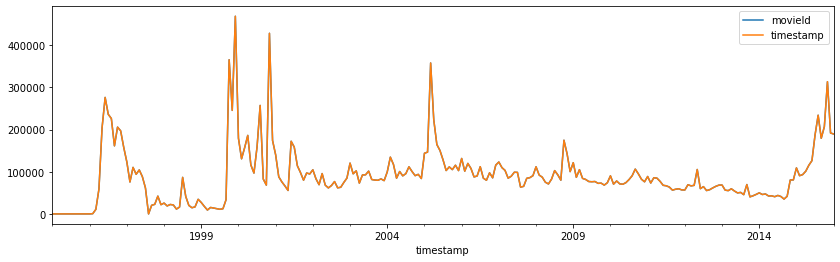

In [28]:
df_ratings[['movieId','timestamp']].resample("M", on ='timestamp').count().plot(figsize=(14,4))

<AxesSubplot:xlabel='timestamp'>

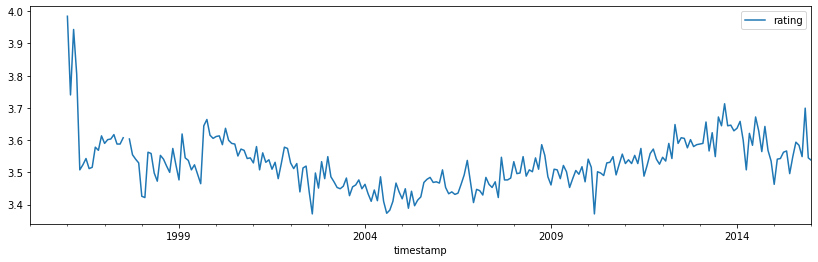

In [29]:
df_ratings[['rating','timestamp']].resample("M", on ='timestamp').mean().plot(figsize=(14,4))

In [30]:
df_ratings[['movieId','rating']]\
    .groupby('movieId')\
    .count()\
    .sort_values(by='rating', ascending=False)\
    .rename(columns={'rating': '#votes'})\
    .head(20)\
    .merge(df_movies, left_index=True, right_on='movieId', how='left')\
    .merge(dfq, on='movieId', how ='left')\
    .sort_values(by='std', ascending=False)

,#votes,movieId,title,genres,year,mean,std
14,53829,780,Independence Day (a.k.a. ID4),"[action, sci-fi, adventure, thriller]",1996,3.396484,1.054630
1,79091,296,Pulp Fiction,"[comedy, drama, thriller, crime]",1994,4.164062,0.984206
7,61267,110,Braveheart,"[action, war, drama]",1995,4.035156,0.961638
5,67092,260,Star Wars: Episode IV - A New Hope,"[action, sci-fi, adventure]",1977,4.156250,0.958329
0,81296,356,Forrest Gump,"[comedy, war, drama, romance]",1994,4.046875,0.948040
4,69545,480,Jurassic Park,"[action, sci-fi, adventure, thriller]",1993,3.652344,0.943379
11,56255,1210,Star Wars: Episode VI - Return of the Jedi,"[action, sci-fi, adventure]",1983,3.992188,0.934624
15,53331,1196,Star Wars: Episode V - The Empire Strikes Back,"[action, sci-fi, adventure]",1980,4.160156,0.919852
8,60424,1,Toy Story,"[animation, comedy, children, fantasy, adventure]",1995,3.894531,0.917573
6,64830,2571,"Matrix, The","[action, sci-fi, thriller]",1999,4.171875,0.909464


In [31]:
dfq['mean'].mean()

3.299

In [32]:
dfc = df_ratings[['movieId','rating']]\
    .groupby('movieId')\
    .count()\
    .sort_values(by='rating', ascending=False)\
    .rename(columns={'rating': '#votes'})\
    .merge(df_movies, left_index=True, right_on='movieId', how='inner')\
    .merge(dfq, on='movieId', how ='inner')\
    .sort_values(by='std', ascending=False)
dfc

,#votes,movieId,title,genres,year,mean,std
6801,230,74754,"Room, The","[comedy, drama, romance]",2003,2.400391,1.767860
7783,158,1311,Santa with Muscles,[comedy],1996,2.597656,1.760735
8301,133,59295,Expelled: No Intelligence Allowed,[documentary],2008,2.074219,1.620765
8128,141,70946,Troll 2,"[horror, fantasy]",1990,2.091797,1.615331
8961,104,50703,"Secret, The",[documentary],2006,2.673828,1.597585
...,...,...,...,...,...,...,...
3125,1164,58303,"Counterfeiters, The (Die Fälscher)","[war, drama, crime]",2007,3.949219,0.663578
8580,120,7050,Follow the Fleet,"[comedy, romance, musical]",1936,3.716797,0.663367
8458,125,46156,"Ax, The (couperet, Le)","[comedy, crime]",2005,3.804688,0.656530
8548,121,99574,Promised Land,[drama],2012,3.343750,0.612485


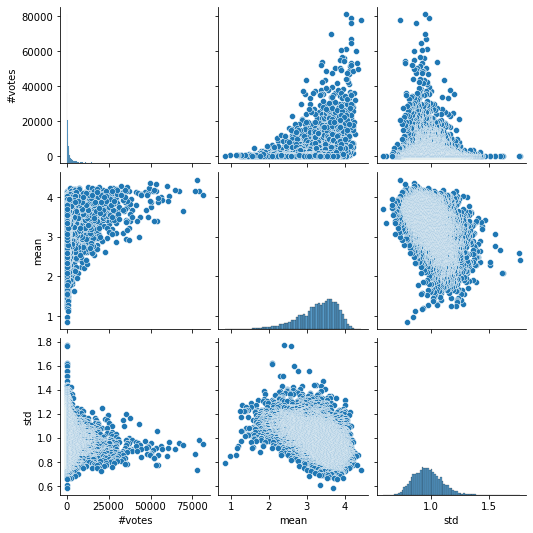

In [33]:
sns.pairplot(dfc[['#votes','mean','std']])

In [34]:
dfg = dfc[['#votes','mean','std','genres']].copy()
dfg['genres'] = dfg['genres'].apply(lambda x: list(x))
dfg = dfg.explode('genres')
dfg = dfg[dfg.index.duplicated()]
dfg

,#votes,mean,std,genres
6801,230,2.400391,1.767860,drama
6801,230,2.400391,1.767860,romance
8128,141,2.091797,1.615331,fantasy
7980,149,2.289062,1.514771,sci-fi
8210,137,3.419922,1.471836,drama
...,...,...,...,...
3125,1164,3.949219,0.663578,crime
8580,120,3.716797,0.663367,romance
8580,120,3.716797,0.663367,musical
8458,125,3.804688,0.656530,crime


ValueError: cannot reindex from a duplicate axis

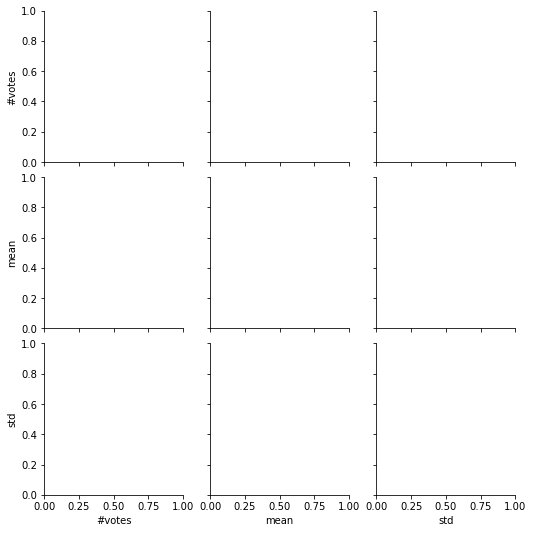

In [35]:
sns.pairplot(dfg[dfg['genres'].isin(['drama','comedy'])],hue ='genres')

In [36]:
dfsw = df_movies[df_movies['title'].str.contains('Star Wars: Episode')].sort_values(by='title')
dfsw['episode'] = range(1,8)
dfsw = dfsw[['episode', 'title', 'year', 'movieId']].merge(df_ratings, on="movieId")
dfsw

,episode,title,year,movieId,rating,timestamp
0,1,Star Wars: Episode I - The Phantom Menace,1999,2628,3.0,2000-11-22 04:34:41
1,1,Star Wars: Episode I - The Phantom Menace,1999,2628,2.0,2005-11-28 03:16:45
2,1,Star Wars: Episode I - The Phantom Menace,1999,2628,5.0,1999-12-12 09:10:34
3,1,Star Wars: Episode I - The Phantom Menace,1999,2628,4.0,2002-05-21 08:26:40
4,1,Star Wars: Episode I - The Phantom Menace,1999,2628,4.0,2000-11-26 21:49:39
...,...,...,...,...,...,...
244854,7,Star Wars: Episode VII - The Force Awakens,2015,122886,1.5,2016-01-17 20:30:39
244855,7,Star Wars: Episode VII - The Force Awakens,2015,122886,3.0,2015-07-24 22:48:56
244856,7,Star Wars: Episode VII - The Force Awakens,2015,122886,4.5,2015-11-27 08:25:38
244857,7,Star Wars: Episode VII - The Force Awakens,2015,122886,4.0,2015-12-20 07:44:15


In [37]:
sw = {}
for i in range(1,8):
    sw[i] = dfsw[dfsw['episode'] ==i][['rating','year', 'timestamp']].resample('Y', on= 'timestamp').mean()
    sw[i] = sw[i].reset_index()
    sw[i]['years_since'] = sw[i]['timestamp']. dt.year - sw[i]['year']
    sw[i] = sw[i][['rating', 'years_since']].set_index('years_since')
    

In [39]:
pd.concat(sw , axis=1)

,1,2,3,4,5,6,7
,rating,rating,rating,rating,rating,rating,rating
years_since,,,,,,,
0.0,3.300781,3.511719,3.697266,NaN,NaN,NaN,4.023438
1.0,3.416016,3.199219,3.496094,NaN,NaN,NaN,3.951172
2.0,3.386719,3.021484,3.337891,NaN,NaN,NaN,NaN
3.0,3.179688,3.029297,3.394531,NaN,NaN,NaN,NaN
4.0,2.976562,3.066406,3.396484,NaN,NaN,NaN,NaN
5.0,2.867188,3.007812,3.353516,NaN,NaN,NaN,NaN
6.0,2.781250,3.087891,3.398438,NaN,NaN,NaN,NaN
7.0,2.906250,3.021484,3.466797,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='years_since'>

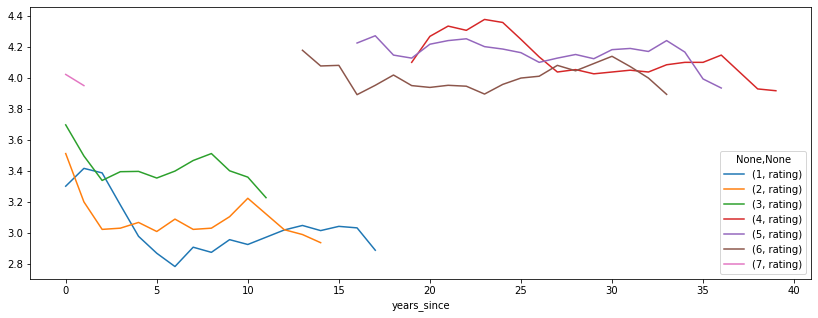

In [40]:
pd.concat(sw, axis=1).plot(figsize=(14,5))

In [42]:
x = sw[1].reset_index().to_numpy()[:,0]
y = sw[1].reset_index().to_numpy()[:,1]
x


array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17.])

In [46]:
from numpy import polyfit

t = np.linspace(0,20,num=21)
deg = 3

coeffs = polyfit(x,y,deg=deg).reshape(-1,1)
X =  np.concatenate(list(map(lambda i: t.reshape(1,-1)**i, reversed(range(deg + 1)))))
Y = (coeffs.T@X).flatten()

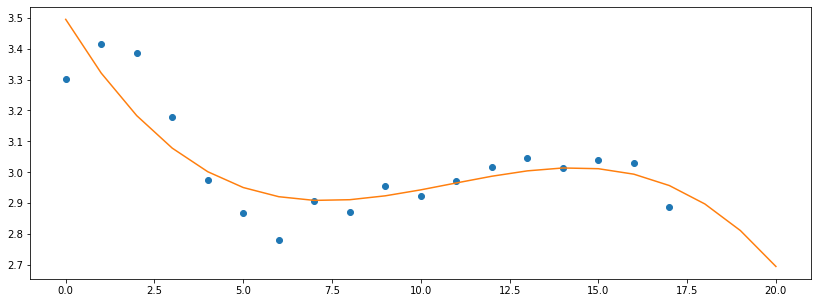

In [48]:
fig, ax=plt.subplots(1,1,figsize=(14,5))
ax.plot(sw[1], 'o')
ax.plot(t,Y)